In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpvroy2hk1GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

In [5]:
images.shape

(6012, 512, 512, 1)

In [6]:
masks.shape

(6012, 512, 512, 1)

In [7]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [8]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 24s 3s/step - loss: 0.6910 - dice_coeff: 0.3113 - val_loss: 0.6894 - val_dice_coeff: 0.3057
Epoch 2/100
5/5 [==============================] - 4s 992ms/step - loss: 0.6887 - dice_coeff: 0.3104 - val_loss: 0.6870 - val_dice_coeff: 0.3054
Epoch 3/100
5/5 [==============================] - 4s 985ms/step - loss: 0.6864 - dice_coeff: 0.3105 - val_loss: 0.6845 - val_dice_coeff: 0.3050
Epoch 4/100
5/5 [==============================] - 4s 980ms/step - loss: 0.6839 - dice_coeff: 0.3103 - val_loss: 0.6819 - val_dice_coeff: 0.3047
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.6813 - dice_coeff: 0.3098 - val_loss: 0.6790 - val_dice_coeff: 0.3042
Epoch 6/100
5/5 [==============================] - 4s 973ms/step - loss: 0.6783 - dice_coeff: 0.3090 - val_loss: 0.6756 - val_dice_coeff: 0.3037
Epoch 7/100
5/5 [==============================] - 4s 969ms/step - loss: 0.6750 - dice_coeff: 0.3085 - val_lo

In [9]:
R.classifier_scores

[[0.4080337584018707, 0.3629685342311859],
 [0.40755781531333923, 0.3712144196033478],
 [0.21809253096580505, 0.6690277457237244]]

In [10]:
R.discriminator_scores

[[1.7649595918101113e-07, 1.0],
 [1.751714080455713e-07, 1.0],
 [542.1539306640625, 0.5249999761581421]]

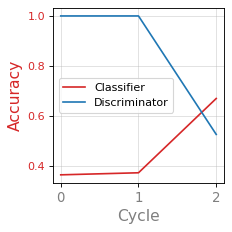

In [11]:
R.plot()